<IPython.core.display.Javascript object>


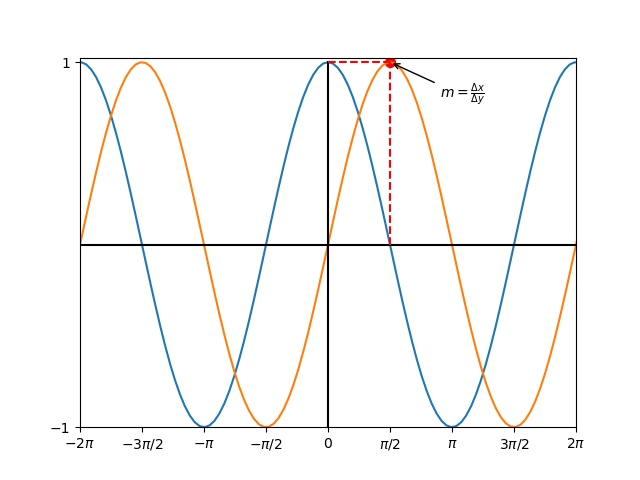

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()
xdata, ydata = [], []
xdata2, ydata2=[],[]
ln2,=ax.plot([],[])
ln,=ax.plot([],[])

def init():
    ax.set_xlim(-2*np.pi, 2*np.pi)
    ax.set_ylim(-1,1.025)
    x = np.linspace(-7,7, 1000)
    y=np.linspace(-1,1,1000) 
    plt.plot(y*0,y,color='black')
    plt.plot(x,x*0,color='black')
    plt.xticks(np.linspace(-2*np.pi,2*np.pi,9),[r'$-2\pi$',
                                               r'$-3\pi/2$',
                                               r'$-\pi$',
                                               r'$-\pi/2$',
                                               r'$0$',
                                               r'$\pi/2$',
                                               r'$\pi$',
                                               r'$3\pi/2$',
                                               r'$2\pi$'])
    plt.yticks([-1,1])

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    xdata2.append(frame)
    ydata2.append(np.cos(frame))
    ln2.set_data(xdata2,ydata2)
    ln.set_data(xdata,ydata)
    if frame==13/8:
        plt.plot([np.pi/2,np.pi/2],[0,np.sin(np.pi/2)],color='red',linestyle='--')
        plt.plot([0,np.pi/2],[np.sin(np.pi/2),np.sin(np.pi/2)],color='red',linestyle='--')
        plt.scatter(np.pi/2,np.sin(np.pi/2),c='red',s=50,marker='o')
        plt.annotate(r'$sin(\frac{\pi}{2})=1$',xy=(np.pi/2,np.sin(np.pi/2)),xytext=((np.pi/2)+(2*np.pi/5),np.sin(np.pi/2)-0.2),arrowprops=dict(arrowstyle='->',facecolor='black'),)


ani = FuncAnimation(fig, update, frames=np.arange(-7,7,0.125),
                    init_func=init,interval=10, blit=True,repeat=False)
plt.show()  
#anim.save('name.gif')

<IPython.core.display.Javascript object>


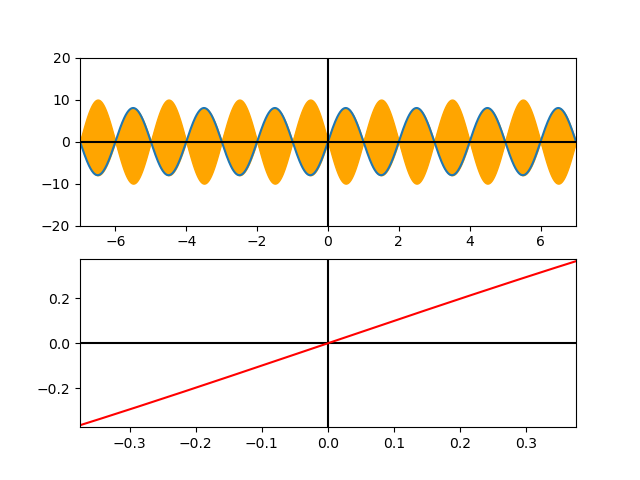

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def abso(x):
    y=x
    if x<0:
        y=-x
    return y



fig, ax = plt.subplots(2)
x = np.linspace(-7,7, 1000)
ln,= ax[0].plot([], [])
ln2,=ax[1].plot([],[])

def init():
    ax[0].set_xlim(-7, 7)
    ax[1].set_xlim(-3, 3)
    ax[0].set_ylim(-20,20)
    ax[1].set_ylim(-3,3)
    y=np.linspace(-20,20,1000) 
    ax[0].plot(y*0,y,color='black')
    ax[1].plot(y*0,y,color='black')
    ax[0].plot(x,x*0,color='black')
    ax[1].plot(x,x*0,color='black')
    ax[1].plot(x,np.sin(x),color='red')

    
def update(frame):
    y=frame*np.sin(np.pi*x)
    ax[0].fill_between(x,y,color='orange')
    ax[1].set_ylim(-3/abs(frame),abs(3/frame))
    ax[1].set_xlim(-3/abs(frame),3/abs(frame))
    ln.set_data(x,y)
    

    

ani = FuncAnimation(fig, update, frames=np.arange(-10,10,2),
                    init_func=init,interval=200, blit=True,repeat=False)
plt.show()  
#anim.save('name.gif')
    
  




<IPython.core.display.Javascript object>


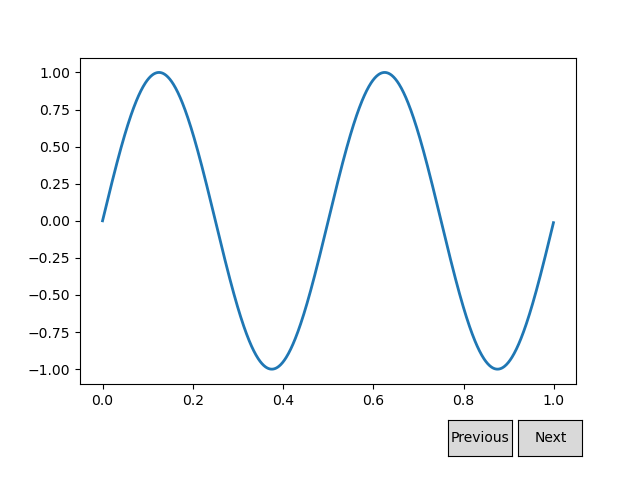

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7,0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()